In [10]:
from nga.utils import load_config, plane_eval_ray_bundle, save_as_image, convert_to_transformed_space
from nerfstudio.utils.eval_utils import eval_load_checkpoint
from nerfstudio.cameras.rays import RayBundle
from nerfstudio.utils import colormaps
from nerfstudio.utils.io import load_from_json

from PIL import Image
from pathlib import Path
import yaml
import torch
import json
import numpy as np
import OpenEXR, Imath
import matplotlib.pyplot as plt

In [2]:

def sphere_eval_ray_bundle(dataparser_transforms_data, sampling_width, n = 1001):
    dataparser_scale = dataparser_transforms_data["scale"]
    x = torch.linspace(-0.5, 0.5, n)
    y = torch.linspace(-0.5, 0.5, n)
    z = sampling_width
    grid_x, grid_y = torch.meshgrid(x, y)
    origins = torch.stack([grid_x, grid_y, z * torch.ones([n, n])], dim=-1)
    origins = convert_to_transformed_space(origins, dataparser_transforms_data)
    directions = torch.zeros_like(origins)
    directions[:, :, 2] = -1.0
    pixel_area = (dataparser_scale ** 2) * torch.ones((n, n, 1)) / (n ** 2)
    nears = torch.zeros((n, n, 1))
    fars = torch.ones((n, n, 1)) * 2 * sampling_width * dataparser_scale
    camera_indices = torch.zeros((n, n, 1))

    ray_bundle = RayBundle(
        origins=origins, directions=directions, pixel_area=pixel_area,
        camera_indices=camera_indices,
        nears=nears,
        fars=fars, 
    )
    return ray_bundle

def load_metadata(config):
    if config.data.suffix == ".json":
        meta = load_from_json(config.data)
        data_dir = config.data.parent
    else:
        meta = load_from_json(config.data / "transforms.json")
        data_dir = config.data
    return meta, data_dir

In [3]:
config_path = "outputs/pattern_plane1_720x480/instant-ngp/2023-09-19_084949/config.yml"
# config_path = "outputs/pattern_plane1_720x480/instant-ngp-bounded/2023-09-18_193840/config.yml"
# config_path = "outputs/pattern_plane1_720x480/nerfacto/2023-09-14_142127/config.yml"
# config_path = "outputs/pattern_plane1_720x480/tensorf/2023-09-17_171505/config.yml"
# config_path = "outputs/pattern_plane1_720x480/kplanes/2023-09-18_222327/config.yml"


config = load_config(config_path)
config.load_dir = config.get_checkpoint_dir()

meta, data_dir = load_metadata(config)


In [4]:

# setup pipeline (which includes the DataManager)
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
pipeline = config.pipeline.setup(device=device, test_mode="val")
pipeline.eval()


checkpoint_path, step = eval_load_checkpoint(config, pipeline)
results_path = config.get_base_dir() / "results.json"
render_output_path = config.get_base_dir() / "renders"
render_output_path.mkdir(parents=True, exist_ok=True)

[10:33:53] Auto image downscale factor of 1                                                 ]8;id=883345;file:///home/ccl/.conda/envs/nerfstudio/lib/python3.8/site-packages/nerfstudio/data/dataparsers/nerfstudio_dataparser.py\nerfstudio_dataparser.py]8;;\:]8;id=886055;file:///home/ccl/.conda/envs/nerfstudio/lib/python3.8/site-packages/nerfstudio/data/dataparsers/nerfstudio_dataparser.py#349\349]8;;\

            Dataset is overriding train_indices to [20, 21, 22, 23, 24, 25, 26, 27, 28, 29, ]8;id=339310;file:///home/ccl/.conda/envs/nerfstudio/lib/python3.8/site-packages/nerfstudio/data/dataparsers/nerfstudio_dataparser.py\nerfstudio_dataparser.py]8;;\:]8;id=101968;file:///home/ccl/.conda/envs/nerfstudio/lib/python3.8/site-packages/nerfstudio/data/dataparsers/nerfstudio_dataparser.py#200\200]8;;\
           30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49,                              
           50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69,                              
           70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89,                              
           90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107,                              
           108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123,                              
           124, 125, 126, 127, 128, 129, 130, 131, 132, 133, 134, 135, 136, 137, 138, 139,                              
           140, 141, 142, 143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155,                              
           156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169, 170, 171,                              
           172, 173, 174, 175, 176, 177, 178, 179]                                                                      

            Dataset is overriding val_indices to [180, 181, 182, 183, 184, 185, 186, 187,   ]8;id=406042;file:///home/ccl/.conda/envs/nerfstudio/lib/python3.8/site-packages/nerfstudio/data/dataparsers/nerfstudio_dataparser.py\nerfstudio_dataparser.py]8;;\:]8;id=511600;file:///home/ccl/.conda/envs/nerfstudio/lib/python3.8/site-packages/nerfstudio/data/dataparsers/nerfstudio_dataparser.py#200\200]8;;\
           188, 189, 190, 191, 192, 193, 194, 195, 196, 197, 198, 199]                                                  

Setting up training dataset...

Caching all 160 images.

Output()

Setting up evaluation dataset...

Caching all 20 images.

Output()

Loading latest checkpoint from load_dir

✅ Done loading checkpoint from 
outputs/pattern_plane1_720x480/instant-ngp/2023-09-19_084949/nerfstudio_models/step-000029999.ckpt

In [12]:


depth_filenames = pipeline.datamanager.eval_dataset.metadata["depth_filenames"]

def read_depth_map(file_path):
    exr_file = OpenEXR.InputFile(file_path)
    dw = exr_file.header()['dataWindow']
    width = dw.max.x - dw.min.x + 1
    height = dw.max.y - dw.min.y + 1
    
    pt = Imath.PixelType(Imath.PixelType.FLOAT)
    depth_str = exr_file.channel('R', pt)
    depth = np.frombuffer(depth_str, dtype=np.float32)
    depth.shape = (height, width)  # reshape
    
    return torch.unsqueeze(torch.from_numpy(depth), dim=-1).to(device=device)

# from: https://github.com/kobejean/bts/blob/d4f1de8f9c8f253cc2bcd1ce0d92fce193a72bac/pytorch/bts_eval.py#L91-L112
def compute_errors(gt, pred):
    thresh = np.maximum((gt / pred), (pred / gt))
    d1 = (thresh < 1.25).mean()
    d2 = (thresh < 1.25 ** 2).mean()
    d3 = (thresh < 1.25 ** 3).mean()
    
    rmse = (gt - pred) ** 2
    rmse = np.sqrt(rmse.mean())
    
    rmse_log = (np.log(gt) - np.log(pred)) ** 2
    rmse_log = np.sqrt(rmse_log.mean())
    
    abs_rel = np.mean(np.abs(gt - pred) / gt)
    sq_rel = np.mean(((gt - pred) ** 2) / gt)
    
    err = np.log(pred) - np.log(gt)
    silog = np.sqrt(np.mean(err ** 2) - np.mean(err) ** 2) * 100
    
    err = np.abs(np.log10(pred) - np.log10(gt))
    log10 = np.mean(err)
    
    return silog, log10, abs_rel, sq_rel, rmse, rmse_log, d1, d2, d3

num_images = len(pipeline.datamanager.fixed_indices_eval_dataloader)
depth_silog = np.zeros(num_images, np.float32)
depth_log10 = np.zeros(num_images, np.float32)
depth_rms = np.zeros(num_images, np.float32)
depth_log_rms = np.zeros(num_images, np.float32)
depth_abs_rel = np.zeros(num_images, np.float32)
depth_sq_rel = np.zeros(num_images, np.float32)
depth_d1 = np.zeros(num_images, np.float32)
depth_d2 = np.zeros(num_images, np.float32)
depth_d3 = np.zeros(num_images, np.float32)

for camera_ray_bundle, batch in pipeline.datamanager.fixed_indices_eval_dataloader:
    image_idx = batch["image_idx"]
    depth_filepath = depth_filenames[image_idx]
    depth_gt = read_depth_map(str(depth_filepath))
    mask = depth_gt <= 1000
    depth_gt[depth_gt > 1000] = torch.min(depth_gt[mask])
    outputs = pipeline.model.get_outputs_for_camera_ray_bundle(camera_ray_bundle)

    rgb_pred = outputs["rgb"]
    rgb_gt = batch["image"]
    acc = outputs["accumulation"]
    acc_vis = colormaps.apply_colormap(acc)

    depth_pred = outputs["depth"]

    depth_pred_vis = colormaps.apply_depth_colormap(
        depth_pred,
        accumulation=outputs["accumulation"],
    )
    depth_gt_vis = colormaps.apply_depth_colormap(
        depth_gt,
    )
    depth_gt_vis = torch.concat([depth_gt_vis, mask], dim=-1)
    depth_diff = depth_pred - depth_gt
    depth_diff[depth_gt > 1000] = torch.min(depth_diff[mask])
    depth_diff_vis = colormaps.apply_depth_colormap(
        depth_diff,
    )
    depth_diff_vis = torch.concat([depth_diff_vis, mask], dim=-1)

    save_as_image(rgb_pred, render_output_path / f"rgb_pred_{image_idx:04d}.png")
    save_as_image(rgb_gt, render_output_path / f"rgb_gt_{image_idx:04d}.png")
    save_as_image(acc_vis, render_output_path / f"acc_{image_idx:04d}.png")
    save_as_image(depth_pred_vis, render_output_path / f"depth_pred_{image_idx:04d}.png")
    save_as_image(depth_gt_vis, render_output_path / f"depth_gt_{image_idx:04d}.png")
    save_as_image(depth_diff_vis, render_output_path / f"depth_diff_{image_idx:04d}.png")

    depth_silog[image_idx], depth_log10[image_idx], depth_abs_rel[image_idx], depth_sq_rel[image_idx], depth_rms[image_idx], depth_log_rms[image_idx], depth_d1[image_idx], depth_d2[image_idx], depth_d3[image_idx] = compute_errors(
            depth_gt[mask].to("cpu").numpy(), depth_pred[mask].to("cpu").numpy())
    
    

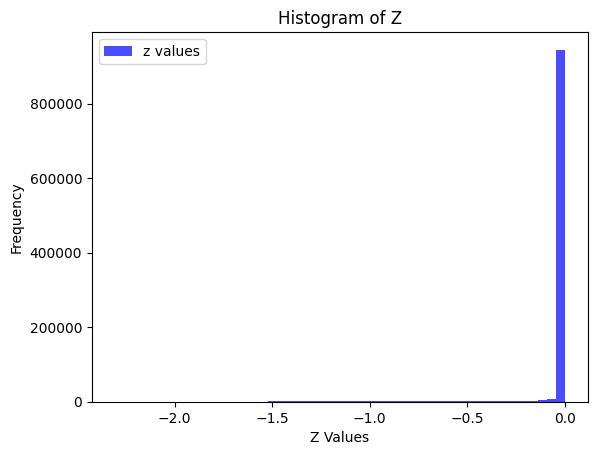

701

In [21]:


# load data for coverting between original and normalized coodinate space
dataparser_transforms_path = config.get_base_dir() / "dataparser_transforms.json"
dataparser_transforms_data = json.load(open(dataparser_transforms_path))
dataparser_scale = dataparser_transforms_data["scale"]
transform = torch.tensor(dataparser_transforms_data["transform"])

sampling_width = 0.5
camera_ray_bundle = plane_eval_ray_bundle(dataparser_transforms_data, sampling_width).to(device)
outputs = pipeline.model.get_outputs_for_camera_ray_bundle(camera_ray_bundle)

rgb = outputs["rgb"]
depth = outputs["depth"]
mask = depth < 2 * sampling_width
mask = torch.abs(depth - torch.mean(depth)) < 1 * torch.std(depth)
acc = colormaps.apply_colormap(outputs["accumulation"])
depth_vis = torch.clone(depth)
depth_vis[torch.logical_not(mask)] = torch.min(depth[mask])
depth_vis = colormaps.apply_depth_colormap(
    depth_vis,
    accumulation=outputs["accumulation"],
)
depth_vis = torch.concat([depth_vis, mask], dim=-1)

z = sampling_width - (outputs["depth"] / dataparser_scale)
z_vis = torch.clone(z)
z_vis[torch.logical_not(mask)] = torch.min(z[mask])
z_vis = colormaps.apply_depth_colormap(
    z_vis,
    accumulation=outputs["accumulation"],
)
z_vis = torch.concat([z_vis, mask], dim=-1)

save_as_image(rgb, render_output_path / "rgb.png")
save_as_image(acc, render_output_path / "acc.png")
save_as_image(depth_vis, render_output_path / "depth.png")
save_as_image(z_vis, render_output_path / "z.png")
torch.save(z_vis, render_output_path / "z.pt")

plt.hist(z.cpu().numpy().flatten(), bins=50, color='blue', alpha=0.7, label='z values')
plt.xlabel('Z Values')
plt.ylabel('Frequency')
plt.title('Histogram of Z')
plt.legend()
plt.savefig(render_output_path / 'z_hist.jpeg')
plt.show()

# Get the output and define the names to save to
benchmark_info = {
    "experiment_name": config.experiment_name,
    "method_name": config.method_name,
    "checkpoint": str(checkpoint_path),
    "results": {
        "max_z": float(torch.max(z)),
        "min_z": float(torch.min(z)),
        "std_z": float(torch.std(z)),
        "mean_z": float(torch.mean(z)),
        "depth_metrics": {
            "silog": float(depth_silog.mean()),
            "log10": float(depth_log10.mean()),
            "abs_rel": float(depth_abs_rel.mean()),
            "sq_rel": float(depth_sq_rel.mean()),
            "rms": float(depth_rms.mean()),
            "log_rms": float(depth_log_rms.mean()),
            "d1": float(depth_d1.mean()),
            "d2": float(depth_d2.mean()),
            "d3": float(depth_d3.mean()),
        }
    },
}
# Save output to output file
results_path.write_text(json.dumps(benchmark_info, indent=2), "utf8")